# Aim 
1. Swap photons between 2 modes
2. Ancilla is a qubit 

In [29]:
%load_ext autoreload
%autoreload 2

# Imports and System Info

In [3]:
#System Info (If using GPUs)
from tensorflow.python.client import device_lib
import tensorflow as tf

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

gpus= get_available_gpus()
print(gpus)

[]


In [6]:
# Imports
import time
import sys 
sys.path.append('/home/eag190/ECD_control/')

import numpy as np
from qutip import *

import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

In [7]:
# To find ECD Control (Alec's code)
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')

In [8]:
# Batch Optimizer
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\mcd\\Echoed Conditional Displacements\\Two Mode\\class_description')
from MECD_paramV1 import BatchOptimizer 


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



# Saving Data

In [9]:
import os 
parent_path = os.getcwd()
data_path = parent_path + r"\data"
data_path


'C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\mcd\\Echoed Conditional Displacements\\Examples\\data'

# Setting Up ECD Parameters

In [20]:
# ----------------------------------------------------------------------------------------------
# Relevant Code
# ----------------------------------------------------------------------------------------------

#Modes Truncation
N = 5 # cavity
n_q = 2 # qubit

def two_mode_state(fock1, fock2, qubit_g = True): 
    '''
    Returns g x fock1 x fock 2
    
    #takes N1, N2 from global
    '''
    psi_1 = basis(N,fock1) #initial state
    psi_2 = basis(N,fock2)
    return tensor(basis(2,0), psi_1, psi_2)



In [12]:
# Set initial and target states
initial = two_mode_state(0, 1)
target = two_mode_state(1, 0)

In [14]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
    'N_modes': 2,
    'N_blocks' : 5, #circuit depth
    'N_multistart' : 4, #Batch size (number of circuit optimizations to run in parallel)
    'BCH_approx': False,
    'epochs' : 100, #number of epochs before termination
    'epoch_size' : 2, #number of adam steps per epoch
    'learning_rate' : 0.01, #adam learning rate
    'term_fid' : 0.995, #terminal fidelitiy
    'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
    'beta_scale' : 3.0, #maximum |beta| for random initialization
    'N_cav': N, #number of levels in mode 1
    #'N_cav2': N2, #number of levels in mode 2
    'initial_states' : [initial], #qubit tensor oscillator, start in |g> |0>
    'target_states' : [target], #end in |e> |target>.
    #"initial_params": init_params,
    'name' : data_path + r'\ECD_control_test5', #% Fock1, #name for printing and saving
    'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
    }


In [15]:
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

5
optimization_type: state transfer
N_modes: 2
N_multistart: 4
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
BCH_approx: False
learning_rate: 0.01
epoch_size: 2
epochs: 100
beta_scale: 3.0
final_disp_scale: 1.0
theta_scale: 3.141592653589793
include_final_displacement: False
real_part_only: False
name: C:\Users\Eesh Gupta\Documents\RU Research\Chakram\mcd\Echoed Conditional Displacements\Examples\data\ECD_control_test5
comment: 
N_cav: 5
filename: C:\Users\Eesh Gupta\Documents\RU Research\Chakram\mcd\Echoed Conditional Displacements\Examples\data\ECD_control_test5.h5

Best circuit parameters found:
betas:         tf.Tensor(
[[ 2.10089+0.52708j  0.27655-0.70408j  1.87065+2.2805j  -1.56067+0.60577j
   0.02975+0.00918j]
 [ 0.94392-0.87841j  0.19831-0.3167j   1.83161-1.01223j -0.82324-1.19976j
   0.3128 -2.53466j]], shape=(2, 5), dtype=complex64)
final_disp:    [0.+0.j]
phis (deg):    tf.Tensor(
[[-156.13033 -105.10085  174.50446  -84.1822     5.18473]
 [  10.43022  104.703

In [16]:
opt.optimize()

Start time: 2023-08-18 09:58:30
 Epoch: 100 / 100 Max Fid: 0.973329 Avg Fid: 0.820806 Max dFid: 0.007632 Avg dFid: 0.002368 Elapsed time: 0:00:14.807925 Remaing time: 0:00:00148437

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_modes: 2
N_multistart: 4
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
BCH_approx: False
learning_rate: 0.01
epoch_size: 2
epochs: 100
beta_scale: 3.0
final_disp_scale: 1.0
theta_scale: 3.141592653589793
include_final_displacement: False
real_part_only: False
name: C:\Users\Eesh Gupta\Documents\RU Research\Chakram\mcd\Echoed Conditional Displacements\Examples\data\ECD_control_test5
comment: 
N_cav: 5
filename: C:\Users\Eesh Gupta\Documents\RU Research\Chakram\mcd\Echoed Conditional Displacements\Examples\data\ECD_control_test5.h5

Best circuit parameters found:
betas:         tf.Tensor(
[[-0.05635+0.025j   -1.28886+0.95268j  0.59659+0.82221j -0.53723+0.39708j
   0.0196

'2023-08-18 09:58:30'

In [17]:
fname = opt.filename

# Pulse Construction and Master Equation Simulation

In [60]:
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\mcd\\Echoed Conditional Displacements\\Two Mode\\class_description\\Old Classes')
from Simulation_Classes_Two_ModeV10 import *

hi


In [61]:
qutip_sim  = qutip_sim_multimode(n_q = n_q, n_c = N, N_modes = 2, 
                  chis = None,
                  method = 'ecd', version = 'ge', 
                                 filename = fname, 
                                )

fidelity for h5 param is 0.9733286
index of fidelity for h5 param is 2
---------------------------
Final Displacement: 2.444380180320781
---------------------------
Final Displacement: 0.06164339431912217
---------------------------
Final Displacement: 2.4167325496673895
---------------------------
Final Displacement: 1.6027333736419374
---------------------------
Final Displacement: 2.448375463485691
---------------------------
Final Displacement: 1.0158501863479776
---------------------------
Final Displacement: 0.6687855124473473
---------------------------
Final Displacement: 0.668044082076869
---------------------------
Final Displacement: 1.0759700536728023
---------------------------
Final Displacement: 0.019618795175777158
hi


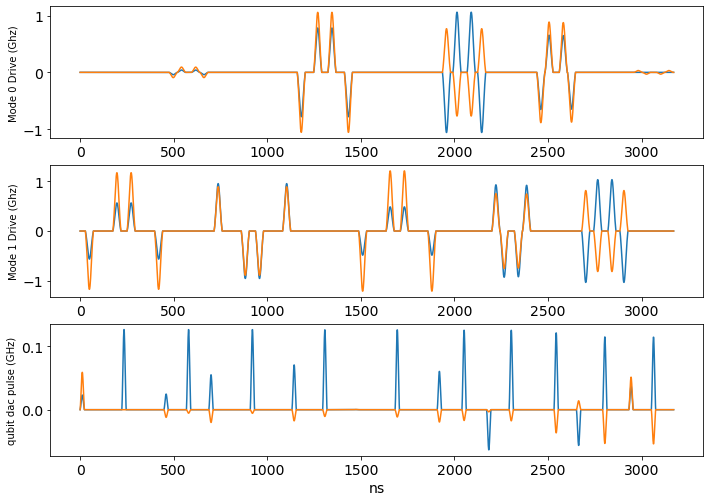

In [62]:
qutip_sim.pulse_sim.plot_pulses()

In [63]:
# Master Equation Simulation
qutip_sim.initialize_ECD_and_qubit_drive() # loading Hamiltonian 
qutip_sim.me_solve(initial = initial) # ME solve

In [64]:
qutip_sim.get_fidelity(target) 

0.968255740113881

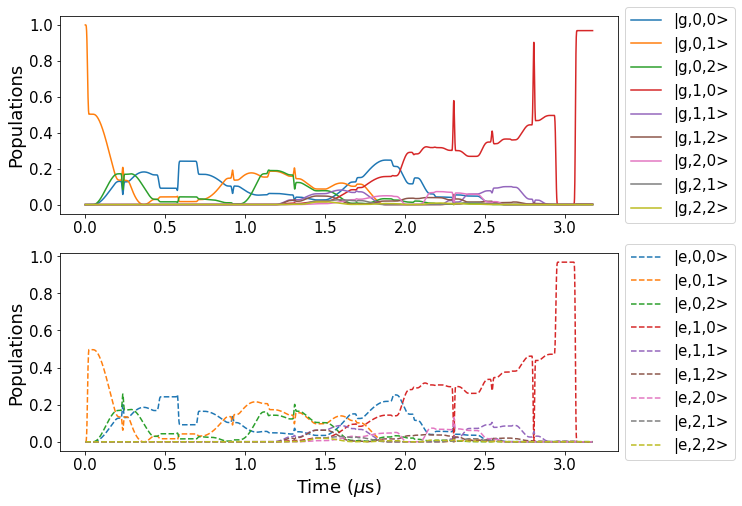

In [66]:
qutip_sim.plot_populations()